In [1]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8m.pt") 

100%|██████████| 49.7M/49.7M [01:24<00:00, 620kB/s] 


In [4]:
source='https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg'

In [5]:
results=model.predict(source=source,
              save=True, conf=0.2,iou=0.5)


100%|██████████| 476k/476k [00:00<00:00, 599kB/s] 
WARNING  NMS time limit 0.550s exceeded
image 1/1 g:\Machine Learning Projects\src\computer_vision\bus.jpg: 640x480 4 persons, 1 bus, 14517.9ms
Speed: 435.9ms preprocess, 14517.9ms inference, 1266.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict


In [6]:
result = results[0]

In [11]:
import cv2
from IPython.display import display
from PIL import Image

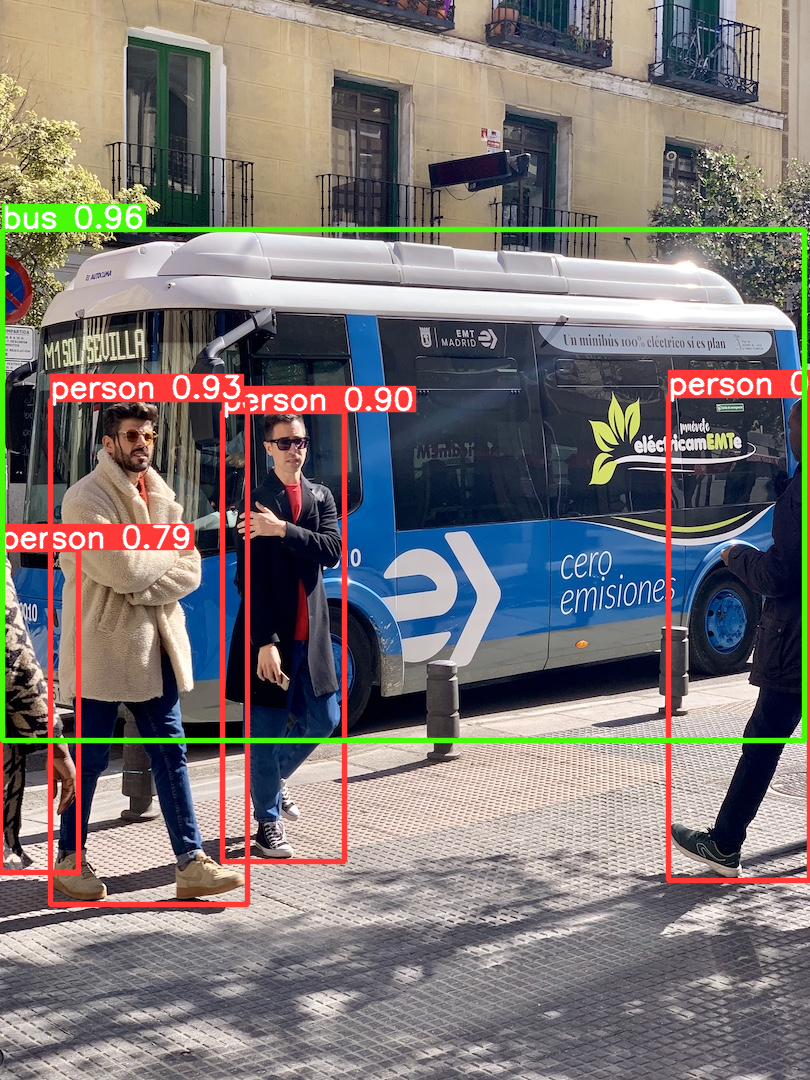

In [12]:
res_plotted = results[0].plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
display(Image.fromarray(res_plotted))

In [13]:
len(result.boxes)

5

In [14]:
box = result.boxes[0]

In [15]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [16]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.])
conf: tensor([0.9595, 0.9276, 0.9226, 0.9017, 0.7927])
data: tensor([[2.9312e+00, 2.2913e+02, 8.0436e+02, 7.4081e+02, 9.5954e-01, 5.0000e+00],
        [5.0429e+01, 3.9968e+02, 2.4746e+02, 9.0459e+02, 9.2756e-01, 0.0000e+00],
        [6.6839e+02, 3.9516e+02, 8.0971e+02, 8.8096e+02, 9.2264e-01, 0.0000e+00],
        [2.2227e+02, 4.1113e+02, 3.4418e+02, 8.6109e+02, 9.0175e-01, 0.0000e+00],
        [2.3668e-01, 5.5000e+02, 7.8286e+01, 8.7247e+02, 7.9271e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[403.6475, 484.9729, 801.4326, 511.6810],
        [148.9455, 652.1385, 197.0324, 504.9107],
        [739.0482, 638.0619, 141.3202, 485.7975],
        [283.2275, 636.1057, 121.9057, 449.9594],
        [ 39.2615, 711.2346,  78.0497, 322.4717]])
xywhn: tensor([[0.4983, 0.4490, 0.9894, 0.4738],
        [0.1839, 0.6038, 0.2432, 0.4675],
        [0.91

In [17]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 5.0
Coordinates: [2.9311866760253906, 229.1324005126953, 804.3638305664062, 740.8134155273438]
Probability: 0.9595426917076111


In [18]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: bus
Coordinates: [3, 229, 804, 741]
Probability: 0.96
---
Object type: person
Coordinates: [50, 400, 247, 905]
Probability: 0.93
---
Object type: person
Coordinates: [668, 395, 810, 881]
Probability: 0.92
---
Object type: person
Coordinates: [222, 411, 344, 861]
Probability: 0.9
---
Object type: person
Coordinates: [0, 550, 78, 872]
Probability: 0.79
---
